<a href="https://colab.research.google.com/github/snehagkadam/Internship-Task/blob/main/Prodigy(Task5_Analysis_of_Traffic_Accident_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-736743861>:6: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("/content/AccidentsBig.csv")


Accidents: (1048575, 30)
Casualties: (59998, 15)
Vehicles: (1048575, 22)


<ipython-input-4-736743861>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accidents["Hour"] = pd.to_datetime(accidents["Time"], errors='coerce').dt.hour


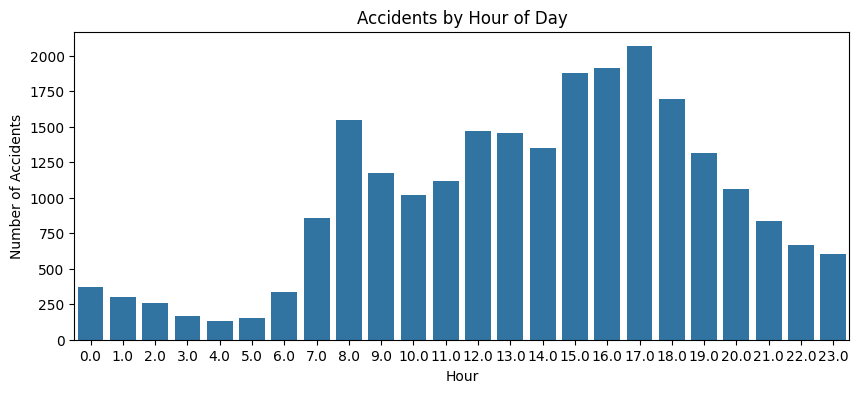

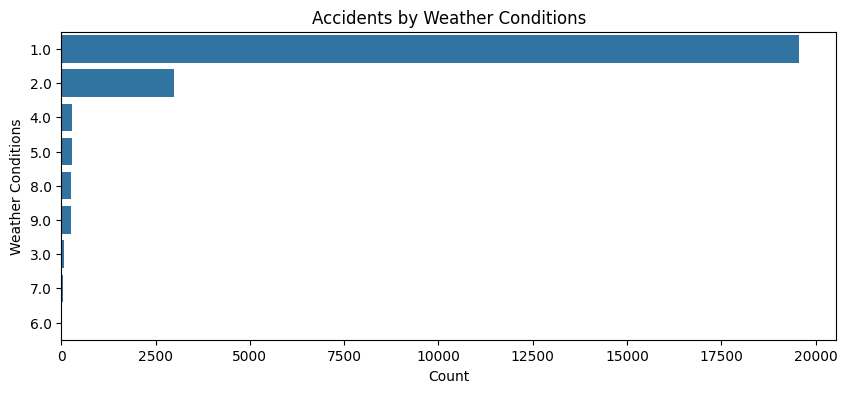

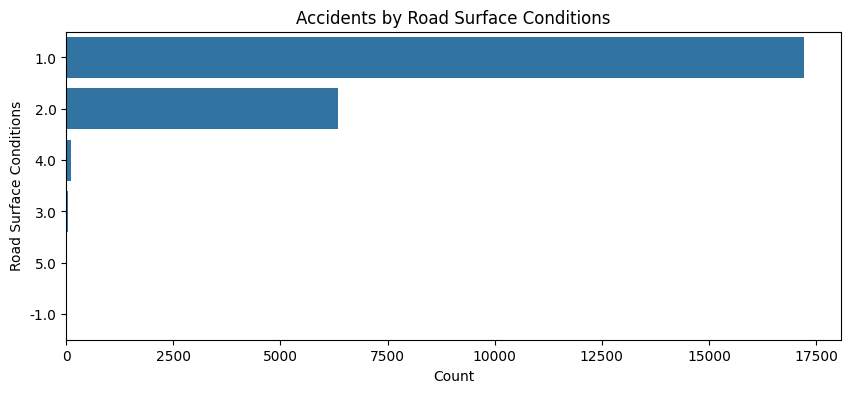

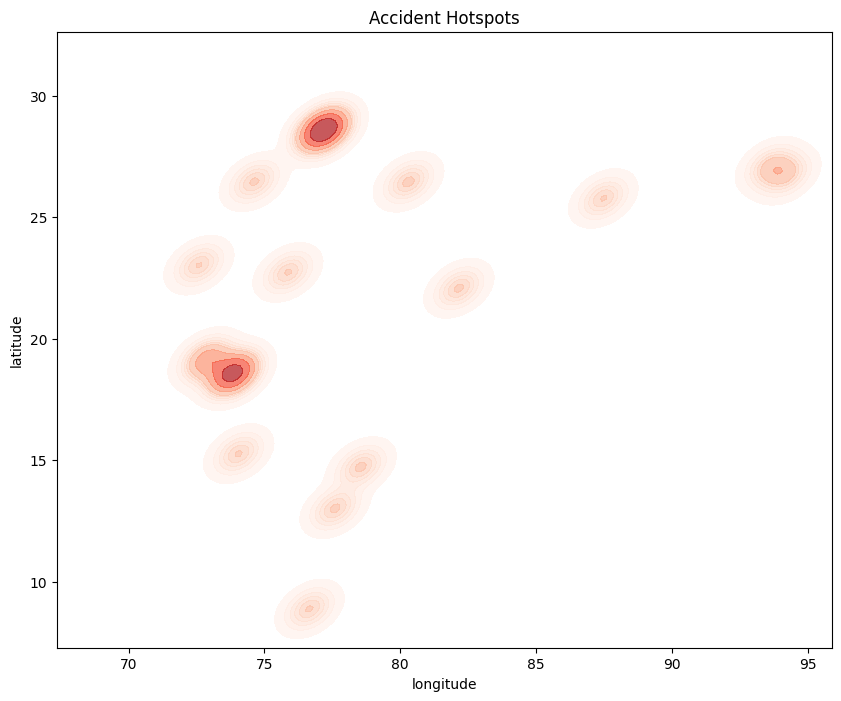

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
accidents = pd.read_csv("/content/AccidentsBig.csv")
casualties = pd.read_csv("/content/CasualtiesBig.csv")
vehicles = pd.read_csv("/content/VehiclesBig.csv")

# Quick overview
print("Accidents:", accidents.shape)
print("Casualties:", casualties.shape)
print("Vehicles:", vehicles.shape)

# --------------------------
# Clean and preprocess data
# --------------------------

# Convert date and time
accidents["Date"] = pd.to_datetime(accidents["Date"], errors='coerce')
accidents["Hour"] = pd.to_datetime(accidents["Time"], errors='coerce').dt.hour

# Drop rows with missing datetime
accidents.dropna(subset=["Date", "Hour"], inplace=True)

# --------------------------
# Analyze by time of day
# --------------------------

# Accidents by hour
plt.figure(figsize=(10, 4))
sns.countplot(data=accidents, x="Hour")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

# --------------------------
# Analyze by weather
# --------------------------

plt.figure(figsize=(10, 4))
sns.countplot(data=accidents, y="Weather_Conditions", order=accidents["Weather_Conditions"].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Weather Conditions")
plt.show()

# --------------------------
# Analyze by road condition
# --------------------------

plt.figure(figsize=(10, 4))
sns.countplot(data=accidents, y="Road_Surface_Conditions", order=accidents["Road_Surface_Conditions"].value_counts().index)
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Count")
plt.ylabel("Road Surface Conditions")
plt.show()

# --------------------------
# Hotspot Visualization (requires lat/lon)
# --------------------------

# Drop rows with missing location
accidents_geo = accidents.dropna(subset=["latitude", "longitude"])

# Plot geographic hotspots
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=accidents_geo,
    x="longitude", y="latitude",
    cmap="Reds", fill=True, bw_adjust=0.5, alpha=0.7, thresh=0.05
)
plt.title("Accident Hotspots")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()
